#### TensorFlow 구글에서 제공하는 오픈소스 머신러닝 플랫폼
- API
- 인공신경망(ANN)(지도 , 비지도)
- input_layer -- hidden_layer -- output_layer
- MLP(Multi Layer Perceptron)
- CNN(합성곱) , RNN(순환)




In [ ]:
# TensorFlow 내부에서 케라스를 사용한다.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation

import numpy as np
import pandas as pd

print('Neural Network(NN) 구성 - ')
print('손실함수(lost function) , 옵티마이저(optimizer)')
print('손실함수 - NN 예측이 얼마나 잘 맞는지 측정하는 역할')
print('옵티마이저 - 알고리즘(예측값을 개선할 수 있도록 최적화된 계산을 하는 것)')
print()

# y = 2x - 1

X = np.array([-1.0 , 0.0 , 1.0 , 2.0 , 3.0 , 4.0] , dtype = float)
y = np.array([3.0 , -1.0 , 1.0 , 3.0 , 5.0 , 7.0] , dtype = float)


# 모델 생성
model = Sequential()

# 입력층 추가
# Dense : output 노드 n개 생성
# input_shape[] : input 노드 개수
print('입력층')
model.add(Dense(units = 1 , input_shape=[1]))

# 손실함수 추가(활성화 함수 - 0.5 미만이면 버리고 05 이상이면 가져가는 이진분류 함수)
# 손실함수는 각각의 모델에 모두 필요하다.
# model.add(Activation('sigmoid'))

# 히든층 추가 input_shape이 존재하지 않음
# print('히든층')
# model.add(Dense(units = 1 ))
# model.add(Activation('sigmoid'))

# model.add(Dense(units = 1 ))
# model.add(Activation('sigmoid'))

# model.add(Dense(units = 1 ))
# model.add(Activation('sigmoid'))

# model.add(Dense(units = 1 ))
# model.add(Activation('sigmoid'))

# print('출력층')
# model.add(Dense(units = 1 ))

# 컴파일이 끝나야 학습이 이루어진다.
# accuracy : 분류 모델
# mean_squared_error : 회귀 모델

model.compile(loss = 'mean_squared_error', optimizer='sgd')

# epochs = 500 훈련 횟수 5백번
# 학습이 epochs만큼 일어난다.

model.fit(X , y , epochs = 500)

print('학습된 모델로부터 예측 값 - ')
y_predict = model.predict([5,0])
print('model guess - ' , y_predict)
# model.predict()




In [19]:
print('학습된 모델로부터 예측 값 - ')
y_predict = model.predict([5,0])
print('model guess - ' , y_predict)

학습된 모델로부터 예측 값 - 
1/1 [==============================] - 0s 50ms/step
model guess -  [[7.06481   7.074926  7.06044  ]
 [1.1799427 1.1634351 1.1870725]]


In [22]:
# y = 2x - 1

X = np.array([-1.0 , 0.0 , 1.0 , 2.0 , 3.0 , 4.0] , dtype = float)
y = np.array([3.0 , -1.0 , 1.0 , 3.0 , 5.0 , 7.0] , dtype = float)

model = Sequential()
model.add(Dense(units = 3 , input_shape=[1]))
model.compile(loss = 'mse')
# model.fit(X , y , epochs = 500)

y_predict = model.predict([0])
print('model guess - ' , y_predict)

print('손실값 - evaluate()')
model.evaluate([0] , [[0, 1, 0]])

1/1 [==============================] - 0s 44ms/step
model guess -  [[0. 0. 0.]]
손실값 - evaluate()
1/1 [==============================] - 0s 96ms/step - loss: 0.3333


0.3333333432674408

In [ ]:
print('옵티마이저 - SGD , Adam , RMSprop etc...')

model = Sequential()
model.add(Dense(units = 3 , input_shape=[1]))
model.compile(loss = 'mse' , optimizer = 'SGD')
# model.fit(X , y , epochs = 500)
history = model.fit([1] , [[0,1,0]] , epochs = 100)

print('손실값 - evaluate()')
# model.evaluate([0] , [[0, 1, 0]])

In [ ]:
history.history

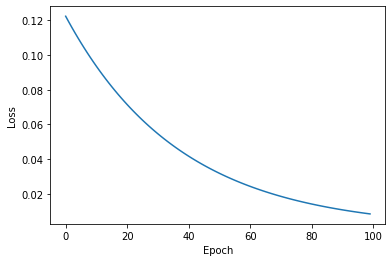

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.close()

In [34]:
print('True | False - AND 논리 연산 결과 출력')
print('ReLU(Recified Linear Unite)')
X = [[0,0],[0,1],[1,0],[1,1]]
y = [[0] , [0] , [0] , [1]]


model = Sequential()

# 4행 2열이므로 input_shape은 2개가 들어간다.

model.add(Dense(units = 3 , input_shape=[2]))
model.add(Activation('relu'))
# 히든층이 아닌 출력층으로서의 역할을 한다.
model.add(Dense(units = 1))
# 모델 생성
#model.compile(loss='mse' , optimizer = 'Adam')
model.compile(loss='mse' , optimizer = 'SGD')
before_predict = model.predict(X)
print('before fit - \n' , before_predict)
# 모델 학습
# verbose 콘솔에 (과정을) 출력합니다.
history = model.fit(X, y , epochs = 1000 , verbose = 0)
# 모델 예측
after_predict = model.predict(X)
print('after_fit - \n' , after_predict)

True | False - AND 논리 연산 결과 출력
ReLU(Recified Linear Unite)
1/1 [==============================] - 0s 52ms/step
before fit - 
 [[0.        ]
 [0.5913974 ]
 [0.7681652 ]
 [0.31468654]]
1/1 [==============================] - 0s 28ms/step
after_fit - 
 [[-0.23283255]
 [ 0.24881905]
 [ 0.25666636]
 [ 0.7383179 ]]


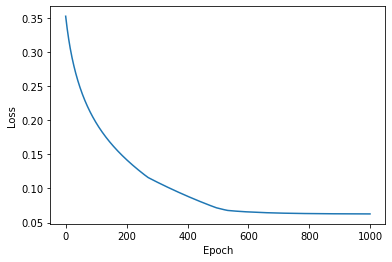

In [35]:
loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.close()

훈련 결과의 시각화 - 


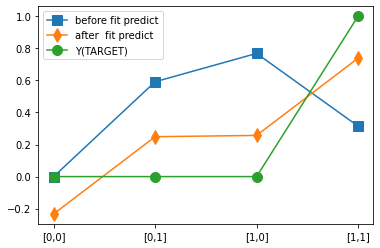

In [38]:
print('훈련 결과의 시각화 - ')
plt.plot(before_predict , 's-' , markersize = 10 , label = 'before fit predict')
plt.plot(after_predict  , 'd-' , markersize = 10 , label = 'after  fit predict')
plt.plot(y  , 'o-' , markersize = 10 , label = 'Y(TARGET)')
plt.xticks(np.arange(4) , labels=['[0,0]' , '[0,1]' , '[1,0]' , '[1,1]'])
plt.legend()
plt.show()
plt.close()

In [79]:
import tensorflow as tf
from tensorflow.keras.models   import Sequential
from tensorflow.keras.layers   import Dense , Activation
# mnist 인공지능 공채 시험 최다
from tensorflow.keras.datasets import boston_housing , mnist
from tensorflow.keras          import optimizers

In [42]:
# boston_housing : 모듈 종류이다.
# 형식이 독특하니 주의하자.
(X_train , y_train) , (X_test , y_test) = boston_housing.load_data()

# 404개의 feature 13개의 input
(X_train.shape , y_train.shape) , (X_test.shape , y_test.shape)


print('회귀 - 보스턴 집값 예측')
# accuracy : 분류 모델
# mean_squared_error : 회귀 모델

회귀 - 보스턴 집값 예측


In [44]:
y_train.dtype

dtype('float64')

In [45]:
print('feature - ' , X_train[0])
print()
print('target - ' , y_train[0])


feature -  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]

target -  15.2


In [48]:
# 1. 모델 생성

house_model = Sequential()

# 2. 모델에 쌓을 수 있는 입력층 생성
# 13개의 입력이 각각 10개의 유닛(피처)에 입력된다.

house_model.add(Dense(units = 10 , input_shape=(13,)))
house_model.add(Activation('sigmoid'))

# 3. 은닉층 생성
# 뉴런 모델은 units 개수가 줄어들어야한다.
# 단, units가 같을 경우 바닐라형이라 불린다.

house_model.add(Dense(units = 10))
house_model.add(Activation('sigmoid'))

house_model.add(Dense(units = 10))
house_model.add(Activation('sigmoid'))

# 4. 활성함수 생성

house_model.add(Dense(units = 1))

# 5 컴파일

# 과대적합이 되지않도록 lr을 조절하여 학습률을 조정할 수 있다.
# lr 높을수록 학습을 대충, 낮을수록 학승을 심하게 하므로 잘 조절하자.

opt = optimizers.SGD(lr = 0.001)

# 회귀 모델이므로 loss : mse , metrics : loss함수의 평균값
house_model.compile(  loss='mse' 
                    , metrics = ['mse']
                    , optimizer = 'SGD')


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# 6. model 피팅

# batch_size : 1번 학습할때 데이터를 몇 개 가져올 것인가
# epochs     : 학습 횟수  - 학습을 많이시키면 과대적합이 생긴다.
# -> 미리 방지할 방법은 없으며, 시각화를 통해 그래프를 보고 loss가 줄어들지 않는 최저점을 확인하여 loss에 대한 변화가 없는 구간을 구하도록 한다.

# loss : 오차 , mse : 정확도
history = house_model.fit(X_train , y_train 
                , batch_size = 50
                , epochs     = 100
                , verbose    = 1)

In [ ]:
history.history

In [75]:
# 13개를 입력받을 수 있는 값이 predict에 들어가야한다.
print('13개의 입력값 - \n' , X_test[0])
print('13개의 입력값 - \n' , X_test[6])
print('목표값 - \n' , y_test[0])
print('위 두개의 값의 오차의 제곱 - mse')

print()

y_predict = house_model.predict(X_test)
print('model guess - ' , y_predict[0])

eval_result = house_model.evaluate(X_test , y_test)
print('metrics name : ', house_model.metrics_names)
print('loss - ' , eval_result[0])
print('mse  - ' , eval_result[1])

13개의 입력값 - 
 [ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]
13개의 입력값 - 
 [3.0490e-02 5.5000e+01 3.7800e+00 0.0000e+00 4.8400e-01 6.8740e+00
 2.8100e+01 6.4654e+00 5.0000e+00 3.7000e+02 1.7600e+01 3.8797e+02
 4.6100e+00]
목표값 - 
 7.2
위 두개의 값의 오차의 제곱 - mse

4/4 [==============================] - 0s 5ms/step
model guess -  [22.751968]
4/4 [==============================] - 0s 3ms/step - loss: 83.3504 - mse: 83.3504
metrics name :  ['loss', 'mse']
loss -  83.35042572021484
mse  -  83.35042572021484


In [80]:
print('다중 분류 - mnist')


(X_train , y_train) , (X_test , y_test) = mnist.load_data()
(X_train.shape , y_train.shape) , (X_test.shape , y_test.shape)

# 가로가 28 세로가 28인 RGB값을 의미


다중 분류 - mnist
11490434/11490434 [==============================] - 0s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

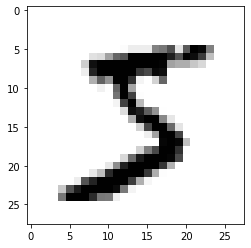

In [82]:
y_train[0]
print()
X_train[0]
print()

plt.imshow(X_train[0] , cmap = plt.cm.binary)
plt.show()
plt.close()

In [83]:
print('퍼셉트론 모델은 행렬을 입력으로 사용할 수 없다. - 1차원 벡터로 변환')
print('reshape 28 * 28 -> 784')

퍼셉트론 모델은 행렬을 입력으로 사용할 수 없다. - 1차원 벡터로 변환
reshape 28 * 28 -> 784


In [86]:
X_train = X_train.reshape((X_train.shape[0] , -1))
X_test  = X_test.reshape((X_test.shape[0] , -1))

In [ ]:
X_train[0]

In [89]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [91]:
(X_train.shape , y_train.shape) , (X_test.shape , y_test.shape)

(((60000, 784), (60000,)), ((10000, 784), (10000,)))

In [92]:
y_train[0]

5

In [93]:
from keras.utils.np_utils import to_categorical
print('다중 분류의 확률을 사용하기 위해서는 타켓의 값을 원-핫 인코딩 해야 한다.')

y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

다중 분류의 확률을 사용하기 위해서는 타켓의 값을 원-핫 인코딩 해야 한다.


In [95]:
for idx in range(10) :
  print(y_train[idx])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
mnist_model = Sequential()
mnist_model.add(Dense(units = 50 , input_shape=(784 ,)))
mnist_model.add(Activation('sigmoid'))

mnist_model.add(Dense(units = 50))
mnist_model.add(Activation('sigmoid'))

mnist_model.add(Dense(units = 50))
mnist_model.add(Activation('sigmoid'))

mnist_model.add(Dense(units = 50))
mnist_model.add(Activation('sigmoid'))

mnist_model.add(Dense(units = 50))
mnist_model.add(Activation('sigmoid'))

mnist_model.add(Dense(units = 10))
mnist_model.add(Activation('softmax'))

mnist_model.summary()

In [111]:

print('분류 손실함수 - binary_crossentropy , categorical_crossentropy')

opt = optimizers.SGD(lr = 0.1)

# 분류 모델이므로 loss : mse , metrics : loss함수의 평균값
mnist_model.compile(  loss='categorical_crossentropy' 
                    , metrics = ['accuracy']
                    , optimizer = opt)

분류 손실함수 - binary_crossentropy , categorical_crossentropy


In [ ]:
# validation_split : 교차 검증

history = mnist_model.fit(X_train , y_train 
                          , batch_size = 500
                          , epochs     = 50
                          , verbose    = 1
                          , validation_split = 0.3)

In [ ]:
history.history

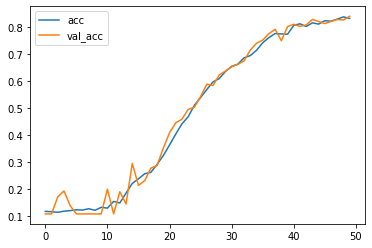

In [113]:
plt.plot(history.history['accuracy'] , label = 'acc')
plt.plot(history.history['val_accuracy'] , label = 'val_acc')

plt.legend()

plt.show()
plt.close()

In [114]:
mnist_model.evaluate(X_test , y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.6074 - accuracy: 0.8391


[0.6074228286743164, 0.8391000032424927]